# Do People Prefer Bigger and More Rooms? 

### With 21597 data of house price, we want to find out 

null hypothesis : Price per square feet living increases when square feet living per number of rooms increases. 

alternative hypothesis : Price per square feet living is the same or decreases when square feet living per number of rooms increases.

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn import linear_model
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df_filtered = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']].dropna()
df_filtered['number_of_rooms'] = df_filtered['bedrooms'] + df_filtered['bathrooms']
df_filtered['sqft_living_per_room'] = df_filtered['sqft_living']/df_filtered['number_of_rooms']
df_filtered['sqft_living_per_bedroom'] = df_filtered['sqft_living']/df_filtered['bedrooms']
df_filtered['price_per_sqft'] = df_filtered['price']/df_filtered['sqft_living']
df_filtered = df_filtered[df['bedrooms'] < 10]
df_filtered = df_filtered[df_filtered['sqft_living_per_bedroom'] < 2500]
df_filtered.sort_values('sqft_living_per_bedroom')

,price,bedrooms,bathrooms,sqft_living,number_of_rooms,sqft_living_per_room,sqft_living_per_bedroom,price_per_sqft
4199,150000.0,3,0.75,490,3.75,130.666667,163.333333,306.122449
319,268750.0,4,1.00,800,5.00,160.000000,200.000000,335.937500
1166,290000.0,2,0.75,440,2.75,160.000000,220.000000,659.090909
11796,225000.0,3,1.00,660,4.00,165.000000,220.000000,340.909091
5433,340000.0,3,1.00,670,4.00,167.500000,223.333333,507.462687
...,...,...,...,...,...,...,...,...
7245,7700000.0,6,8.00,12050,14.00,860.714286,2008.333333,639.004149
15553,1830000.0,3,3.75,6030,6.75,893.333333,2010.000000,303.482587
5577,360000.0,1,2.25,2060,3.25,633.846154,2060.000000,174.757282
2123,1330000.0,3,3.75,6400,6.75,948.148148,2133.333333,207.812500


<AxesSubplot:>

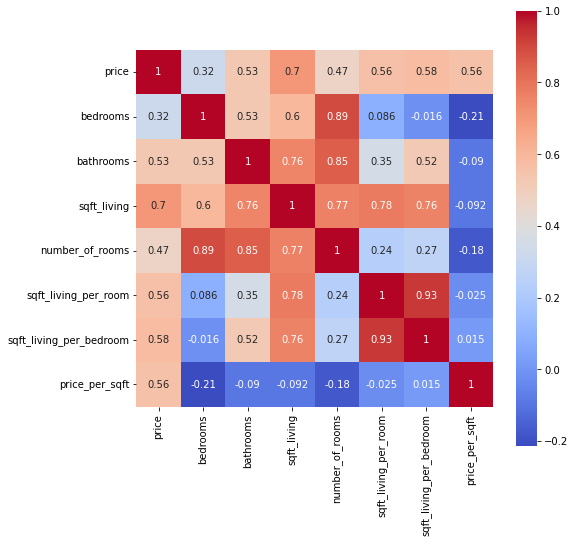

In [5]:
plt.figure(figsize = (8, 8))

sns.heatmap(df_filtered.corr(), cmap="coolwarm", annot = True, square = True)

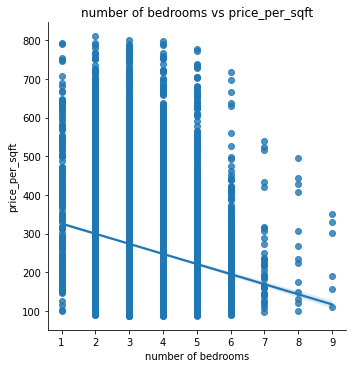

In [6]:
sns.lmplot(data=df_filtered, x='bedrooms', y='price_per_sqft')
plt.xlabel('number of bedrooms')
plt.ylabel('price_per_sqft')
plt.title('number of bedrooms vs price_per_sqft');

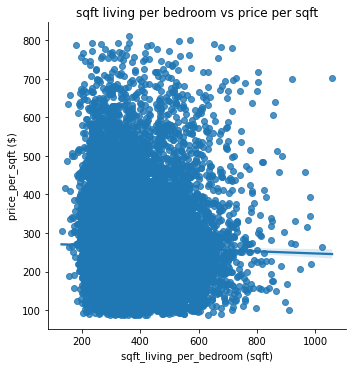

In [17]:
sns.lmplot(data=df_filtered, x='sqft_living_per_room', y='price_per_sqft')
plt.xlabel('sqft_living_per_bedroom (sqft)')
plt.ylabel('price_per_sqft ($)')
plt.title('sqft living per bedroom vs price per sqft');

0.8829635338091724
0.8752347320872154


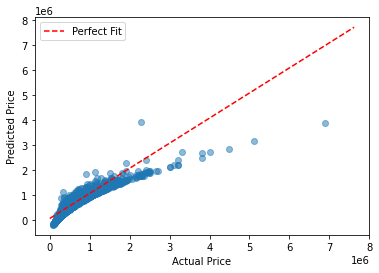

In [13]:
final_model = LinearRegression()
X = df_filtered[['sqft_living_per_bedroom', 'sqft_living_per_room','price_per_sqft','sqft_living']]
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

final_model.fit(X_train, y_train)
print(final_model.score(X_train, y_train))

preds = final_model.predict(X_test)
fig, ax = plt.subplots()
#take out scientific notations 

perfect_line = np.arange(y_train.min(), y_train.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

print(final_model.score(X_test, y_test))

In [20]:
X = sm.add_constant(df_filtered[['bedrooms','bathrooms','sqft_living_per_bedroom','sqft_living']])
model = sm.OLS(endog=y, exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5711.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        12:48:44   Log-Likelihood:            -2.9946e+05
No. Observations:               21589   AIC:                         5.989e+05
Df Residuals:                   21584   BIC:                         5.990e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3.821e+05   1.88e+04     20.299      0.000    3.45e+05    4.19e+05
bedrooms                -1.464e+05   5449.506    -26.867      0.000   -1.57e+05   -1.36e+05
bathrooms                1.132e+04   3503.246      3.230      0.001    4450.026    1.82e+04
sqft_living_per_bedroom  -475.7819     28.181    -16.883      0.000    -531.019    -420.545
sqft_living               443.1214      8.358     53.021      0.000     426.740     459.503
==============================================================================
Omnibus:                    13281.168   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           360415.409
Skew:                           2.495   Prob(JB):                         0.00
Kurtosis:                      22.385   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""